# 文本分析

## 文本分析概述

文本分析是指对文本的表示及其特征项的选取；文本分析是文本挖掘、信息检索的一个基本问题，它把从文本中抽取出的特征词进行量化以表示文本信息。

## 结构/非结构化数据

- 结构化数据：指的就是可以用二维表组织、分析处理过程较为明确的信息，可以将这种结构化的二维表组织方式理解为一个表格，表格里的每一个元素都被明确标记并很容易被识别。数字、符号等属于结构化数据。
- 非结构化数据：指多种信息的无结构混合，通常无法直接知道或明确理解其内部结构，只有经过识别、有条理的存储分析后才能体现其结构化特征，通过文本挖掘，发现价值。文本、图片、声音、视频等属于非结构化数据。
- 半结构化数据：介于结构化数据和非结构化数据两者之间的数据称为半结构化数据，大多数文本，既包含标题、作者、分类等结构字段，又包含非结构化的文字内容，这类文本均属于半结构化数据。如，新闻等。

## 文本数据特点

（1）非结构化（非结构化数据占绝大部分）  
（2）海量数据  
（3）高维稀疏性  
（4）语义/情感

## 自然语言处理——NLP

自然语言处理（Natural Language Processing，NLP）作为计算机科学领域与人工智能领域中的一个重要方向，是处理文本信息的一种重要手段。它研究能实现人与计算机之间用自然语言进行有效通信的各种理论和方法。主要包括以下内容：

- 机器翻译
- 自动摘要
- 文本分类
- 信息检索
- 信息抽取
- 自动问答
- 情感分析
- ……

## 文本挖掘的应用

- 词频分析
- 关键词提取
- 语义网
- 文本分类
- 情感分析
- 主题模型
- ……

## 算法原理

### TF-IDF

TF-IDF是一种用于信息检索与数据挖掘的常用加权技术，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。

- **TF（Term Frequency）词频**，某个词在文章中出现的次数或频率。如果某篇文章中的某个词出现多次，那这个词可能是比较重要的词。
- **IDF（Inverse Document Frequency）逆文档频率**，指词语“权重”的度量。在词频的基础上，如果一个词在多篇文档中词频较低，也就表示这是一个比较少见的词，但却在某一篇文章中出现了很多次，**则这个词IDF值越大，在这篇文章中的“权重”越大**。即，当一个词越常见，其IDF值越低。
- 当计算出TF和IDF值后，**两数相乘即为TF-IDF**：**某词的TF-IDF值越高，说明其在这篇文章中的重要性越高，越有可能是文章的关键词。**

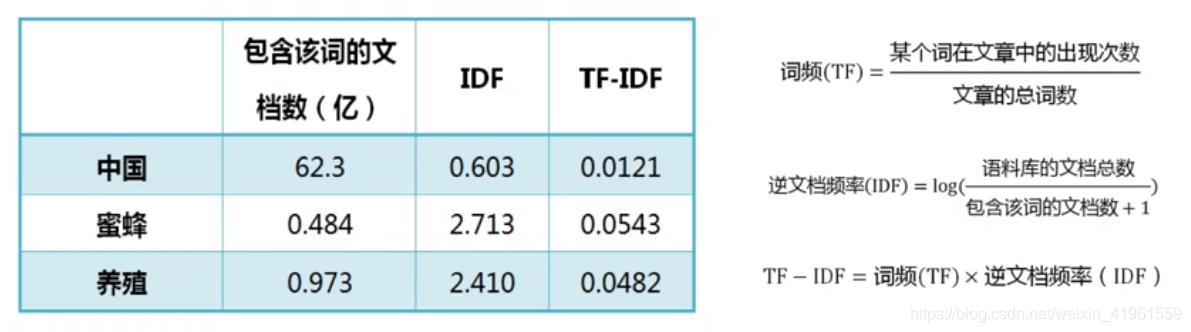

### TextRank

TextRank算法是一种用于文本的基于图的排序算法。

- 基本思想：来源于谷歌的PageRank算法，通过把文本分割成若干组成单元（单词、句子）并建立图模型，利用投票机制对文本中的重要成分进行排序。
- 优点：不需要事先对多篇文档进行学习训练，仅利用单篇文档本身的信息即可实现关键词提取、文摘，因其简洁有效而得到广泛应用。

PageRank最开始用来计算网页的重要性。整个互联网可以看做一张有向图，节点是网页。如果网页A存在到网页B的链接，那么有一条从网页B指向网页A的有向边。

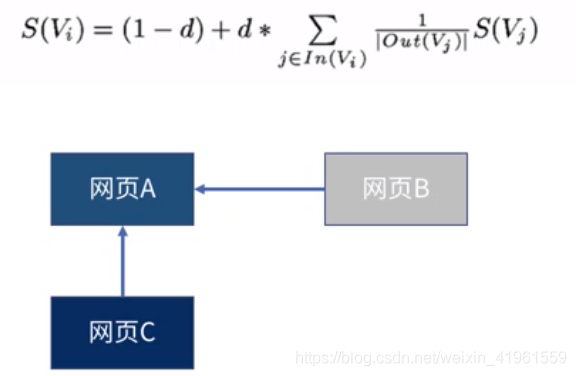

其中，S(Vi)是网页i的重要性（PR值），d是阻尼系数，一般设置为0.85，In(Vi)是存在指向网页i的链接的网页集合，Out(Vj)是网页j中的链接存在链接指向网页的集合，|Out(Vj)|是集合中元素的个数。

# 分词

分词，是将连续字符组成的语句按照一定规则划分成一个个独立词语的过程。

- 停用词：“This”，“that”，“的”、“地”、“啊”，……
- 歧义词：我们需要有自主权→自主/主权
- 未登录词（训练时未出现，测试时出现了的单词）：“喜大普奔”，“洪荒之力”，……

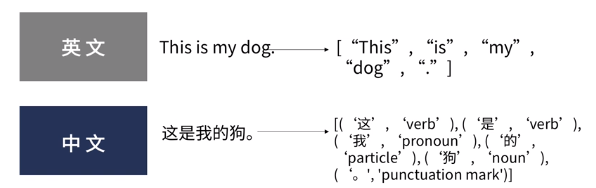

## 常用概念

### 词汇表

#### 核心概念

在自然语言处理（NLP）中，词汇表（Vocabulary） 是指一个模型或算法在处理文本时使用的标记（tokens）的集合。它是模型能够“理解”和处理的所有单词、子词或字符的列表。

词汇表的核心概念  

标记（Tokens）  
- 词汇表中的每个元素称为“标记”。  
- 一个标记可以是：  
    - 单词（如 dog、running）  
    - 子词（如 run 和 ##ning，其中 ## 表示后缀）  
    - 字符（如 r、u、n）  
    - 标点符号（如 .、!、?）

固定大小  
- 词汇表的大小通常由参数 vocab_size 控制。  
- 如果文本中标记的数量超过了 vocab_size，低频标记会被替换成 <unk>（unknown token）。

唯一性
- 词汇表是一个去重后的集合，保证每个标记在词汇表中只出现一次。

特殊标记  
- 词汇表通常包含一些特殊标记，比如：  
    - \<pad>：表示填充（padding），对齐不同长度的序列。    
    - \<unk>：表示未知标记，替代词汇表中未包含的标记。  
    - \<bos> 和 \<eos>：表示句子开头（beginning of sentence）和结尾（end of sentence）。

#### 作用

词汇表在 NLP 模型中的作用

编码文本
- 模型需要将文本转换为数值形式，词汇表充当“翻译字典”：
- 例如，['hello', 'world', '<pad>'] 可能对应 [1, 2, 0]。

限制处理范围

- 通过定义词汇表的大小，可以减少计算复杂度和模型的内存占用。

减少数据稀疏性

- 在子词级别（如 BPE、SentencePiece）中，词汇表可以将稀有单词分解为更常见的子词，从而更高效地表示语言。


#### 词汇表生成

词汇表生成

首先，构建一个词汇表（Vocabulary），它是一个包含所有唯一标记的列表或集合。  
每个标记都会分配一个唯一的索引号（从 0 开始）。  
Vocabulary: ['<pad>', '<unk>', 'I', 'love', 'cats', '.']  
Index:      [  0,       1,       2,    3,      4,     5 ]  

文本映射到索引

对输入文本进行分词或子词分解，然后将标记按照词汇表中的索引进行替换。  
未知标记（词汇表中未包含的标记）用 <unk> 的索引代替。  
Text: "I love dogs."  
Tokens: ['I', 'love', '<unk>', '.']  
Indices: [ 2,     3,       1,   5 ]

#### 索引顺序

词汇表的索引顺序

索引通常从 0 开始，保留一些特殊标记在固定位置：  
\<pad>：通常为索引 0，用于填充序列。  
\<unk>：为索引 1，表示未知标记。  
**其余标记按照频率或出现顺序排序**。  

稀有词的处理

如果某个标记未在词汇表中找到（低频或未登录词），会映射为 \<unk> 的索引。  
例如，如果 dogs 不在词汇表中，上面的例子就用 \<unk> 的索引替代。  

特殊标记

标记如 \<pad>、\<bos>、\<eos> 等，在模型处理中也需要索引化，以便处理序列对齐和序列边界。

## 简单分词

### split分词

对句子进行切分的最简单方法就是利用字符串中的空白符来作为词的“边界”。在python中可以通过标准库方法split来实现这种操作。

In [1]:
sentence = """Thomas Jefferson began building Monticello at the age of 26."""
print(sentence.split())

['Thomas', 'Jefferson', 'began', 'building', 'Monticello', 'at', 'the', 'age', 'of', '26.']


### 正则表达式

In [8]:
import re
sentence = """Thomas Jefferson began building Monticello at the age of 26."""
pattern = re.compile(r'([-\s.,;!?])+')
tokens = pattern.split(sentence)
print(tokens)
print([x for x in tokens if x and x not in '- \t\n.,;!?'])

['Thomas', ' ', 'Jefferson', ' ', 'began', ' ', 'building', ' ', 'Monticello', ' ', 'at', ' ', 'the', ' ', 'age', ' ', 'of', ' ', '26', '.', '']
['Thomas', 'Jefferson', 'began', 'building', 'Monticello', 'at', 'the', 'age', 'of', '26']


## 分词器原理

分词这个过程，是将输入的整个文本，根据分词规则，将整个文本拆成一个个小词；每一个小词都有一个自己对应的index（或者向量），从而做到将整段文本转换成一个仅包含数字的序列。

其中，执行分词的算法模型称为分词器（Tokenizer） ，划分好的一个个词称为 Token。

Tokenizer 允许使用两种方法向量化一个文本语料库：

1. 将每个token转化为一个整数序列（每个整数都是词典中标记的索引）；

2. 将每个token转化为一个向量，其中每个token对应的向量可以是二进制值、词频、TF-IDF权重等。

在理解了分词的过程后，tokenzier的功能可以总结为：

1. 将文本切分成token；

2. 将切分好的文本数值化，并输入至后续模型；

为了更高效地分词以及实现后续的任务，我们希望分词器尽可能地让每个token向量蕴含更多有用的信息，然后再把这些向量输入到算法模型中。

但是在实际的分词实现过程中，往往会遇到的问题是：文本的词太多了 。如果把所有的词都放入tokenizer中，这不现实，也不高效。

因此，为了方便后续算法模型训练，我们会选取出频率 （也可能是其它的权重）最高的若干个词组成一个词表（Vocabulary），从而根据这个词表再来对文本进行分词。

根据这个原则，有很多的分词方法衍生出来，帮助NLP模型更高效地理解、处理文本。

### 古典分词法

古典分词法，也是最基础的分词法，包括基于word和基于character的分词方法。

#### 基于词的(word-based)分词法

基于词的(word-based) tokenizer，通常很容易设置和使用，只需几条规则（例如，基于空格分词，基于标点符号分词），并且通常会产生不错的结果。

一个典型的基于词的分词过程如下所示：
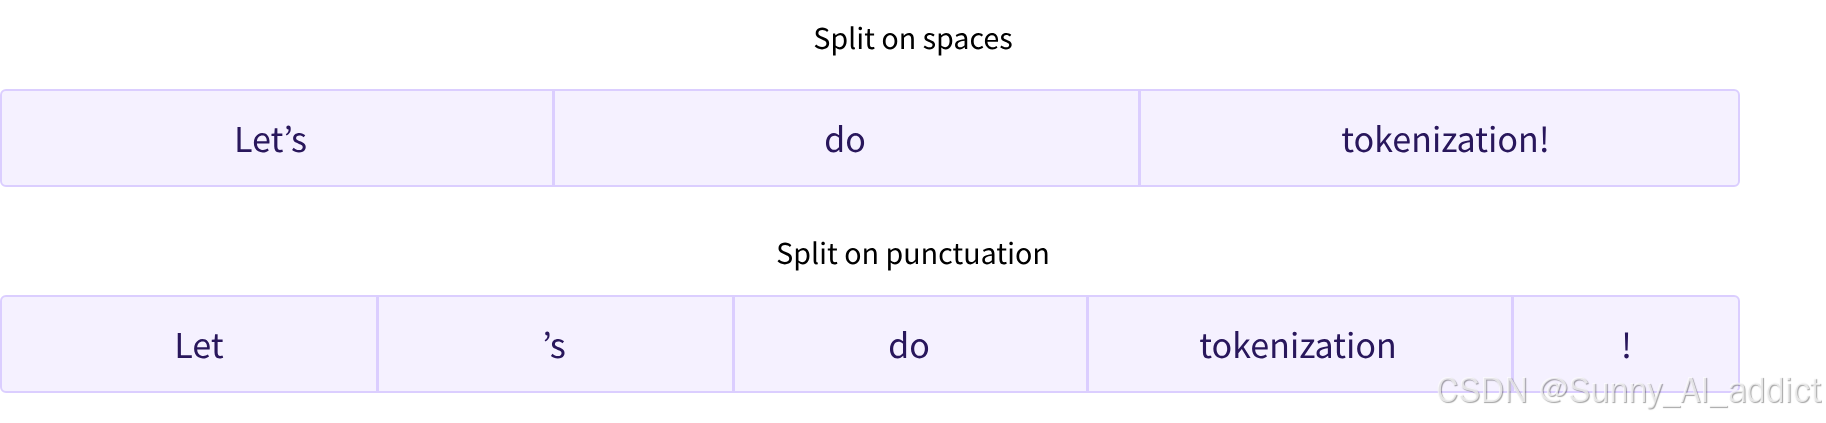
基于词的古典分词法，优点缺点都很鲜明：

优点：  
确实很容易理解，也易于操作；

缺点：  
这种分词法会得到非常大的“词汇表”，其中词汇表由语料库中拥有的独立标记的总数定义（这个数量是不可详尽的）。

对于未在词表中出现的词（Out Of Vocabulary, OOV ），模型将无法处理（未知符号标记为 [UNK]）。  
词表中的低频词在模型训无法得到训练（因为词表大小有限，太大的话会影响效率）。  
很多语言难以用空格进行分词，例如英语单词的多种形态，"look"衍生出的"looks", "looking", "looked"，其实都是一个意思，但是在词表中却被当作不同的词处理，模型也无法通过"old", "older","oldest"之间的关系学到另外的形容词之间的关系。这一方面增加了训练冗余，另一方面也造成了大词汇量问题。

#### 基于字符的(Character-based)分词法

基于字符的标记器(tokenizer)将文本拆分为字符，而不是单词。

一个典型的基于字符的分词过程如下所示：
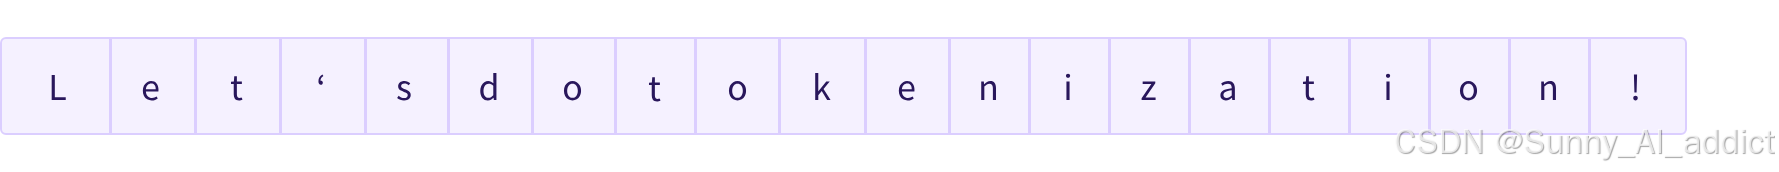
这有两个主要好处：

词汇量要小得多。  
词汇外（未知）标记(token)要少得多，因为每个单词都可以从字符构建。  

这种分词方法虽然能解决 OOV 问题，也避免了大词汇量问题，但缺点也十分明显：

粒度太细（一个词会被分成很多个字符），每个token的信息密度低。  
训练花费的成本太高；解码效率很低。  
在某些语言中，由于现在表示是基于字符而不是单词。每个字符本身并没有多大意义。

### 基于子词的分词方法

在分析完基于词和基于字符的古典分词法的优缺点之后，我们自然希望通过某种方式结合两种分词法分优点，并尽可能地克制缺点，但问题是，到底怎么做才能实现强强联合呢？

我们都知道，随着 BERT 算法的横空出世，NLP 中的很多领域都被颠覆性的改变了，BERT 也成为了一个非常主流的 NLP 算法。由于 BERT 的特性，要求分词方法也必须作出改变。从此，基于子词的分词方法（Subword Tokenization）诞生了 ，该算法现在已经成为一种标配。

基于子词的分词方法（Subword Tokenization） ，简称为 Subword 算法，意思就是把词切成更小的一块一块的子词，这些子词本身也具有一定的语义：

高频词依旧切分成完整的整词

低频词被切分成有意义的子词，例如 dogs => [dog, ##s]

这种方法的目的是通过一个有限的词表 来解决所有单词的分词问题，同时尽可能将结果中词汇表的数目降到最低。例如，可以用更小的sub-word组成更大的词，例如：

“unfortunately” = “un ” + “for ” + “tun ” + “ate ” + “ly ”。

可以看到，有点类似英语中的词根词缀拼词法，其中的这些小片段又可以用来构造其他词。可见这样做，既可以降低词表的大小，同时对相近词也能更好地处理。

这种方法在土耳其语等粘着型语言(agglutinative languages)中特别有用，可以通过将子词串在一起来形成（几乎）任意长的复杂词。

Subword 相较于传统分词方法的优点：

学习到词之间的关系：传统分词法不利于模型学习词缀之间的关系，例如模型无法学习到“old”, “older”, and “oldest”之间的关系。  
平衡 OOV 问题：传统分词法无法很好的处理未知或罕见的词汇（OOV 问题），而基于字符的分词法作为 OOV 的解决方法又有粒度太细的问题；  
subword分词法可以通过“拼词”的方式处理很多罕见的词汇，其粒度在词与字符之间，能够较好的平衡 OOV 问题。  
目前有三种主流的 Subword 算法，它们分别是：Byte Pair Encoding (BPE)、WordPiece 和 Unigram Language Model。

#### BPE

字节对编码（BPE,Byte Pair Encoding）最初被开发为一种压缩文本的算法，后来在预训练 GPT 模型时被 OpenAI 用于分词。发展到现在，许多 Transformer 模型都使用它，包括 GPT、GPT-2、RoBERTa、BART 和 DeBERT；许多的开源LLM模型使用的也是BPE或者BPE的改进分词法，例如Llama系列、Mistral、Qwen等。

BPE分词算法的过程如下：

- 准备足够大的训练语料，并确定期望的词表大小；
- 在每个单词末尾添加后缀 \</w> （用于标明词尾），统计每个单词出现的频率；例如，low的频率为 5，那么我们将其改写为"low </w>" : 5

    注：停止符 \</w> 的意义在于标明词尾。为什么需要标明词尾呢？举例来说：st不加 </w> 可以出现在词首，如star；加了</w>之后表明该子词位于词尾，如west \</w>，二者意义截然不同。
- 将语料库中所有单词拆分为单个字符，用所有单个字符建立最初的词典，并统计每个字符的频率（这一步和基于字符的分词法类似）；
- 在语料上统计单词内相邻单元对的频数，选取频数最高的单元对合并成新的Subword单元；
- 重复第3步直到达到第1步设定的Subword词表大小或下一个最高频数为1。

总体来说，BPE算法在合并字符的过程遵循一个贪心算法的原则：每一轮选择出现频数最大的相邻字符对进行合并。这种做法可能不一定是全局最优、频数也不一定是最好的合并指标，但不可否认BPE是一个性能非常高效的Tokenizer算法、同时它能很方便将Token总数量控制在一个手动设置的数目内。

BPE 一般适用在欧美语言/拉丁语系，因为欧美语言大多是字符形式，涉及前缀、后缀的单词比较多。对于英文、拉美体系的语言来说使用BPE分词足以在可接受的词表大小下解决OOV的问题，但面对中文、日文等语言时，其稀有的字符可能会不必要地增加最终词汇表的大小；

同时，BPE也存在面对多语言分词时，无法保持效果的问题。

对于以上提到的这些问题，接下来介绍的BBPE (Byte-level Byte Pair encoding) 就进入舞台了 

我们用一个例子来更进一步地说明BPE的大致过程：
1. 第一步，准备语料库。我们以以下这段话为例：“FloydHub is the fastest way to build, train and deploy deep learning models. Build deep learning models in the cloud. Train deep learning models.”
2. 加后缀，统计词汇频率：
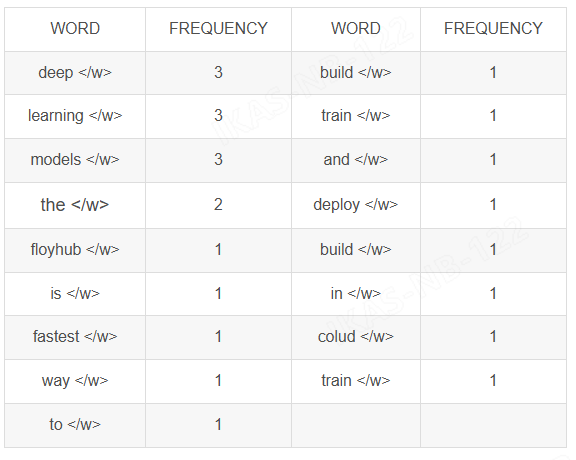
3. 拆分为单个字符，统计字符频率（顺便排个序）:
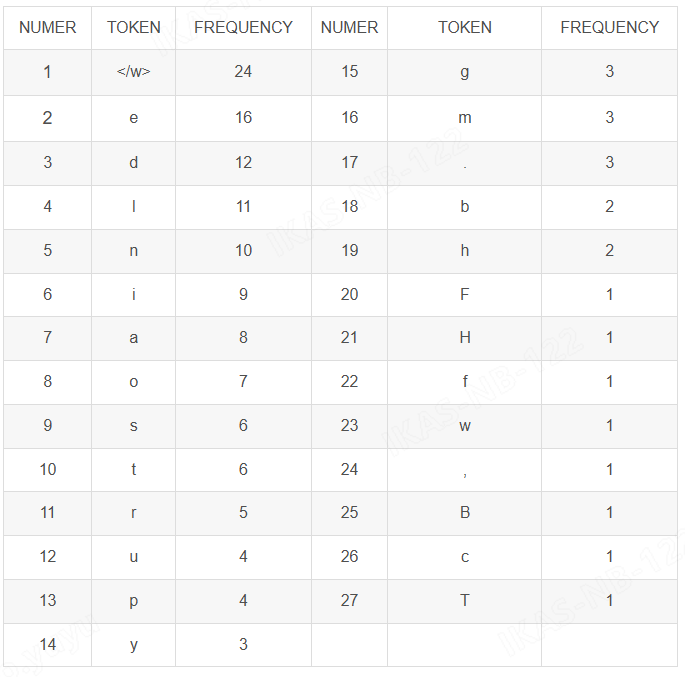
4. 以第一次迭代为例，将字符频率最高的 d 和 e 替换为 'de'：  
（'de'在该语料库中出现的次数为7，因此从'd'和'e' 各自的出现次数减去7，然后增加'de' ，其出现次数为7。）
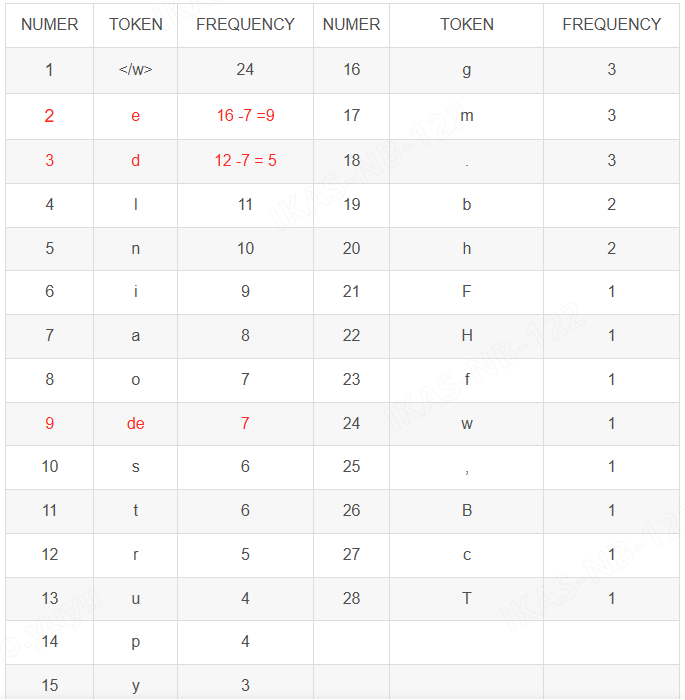
5. 更新词表
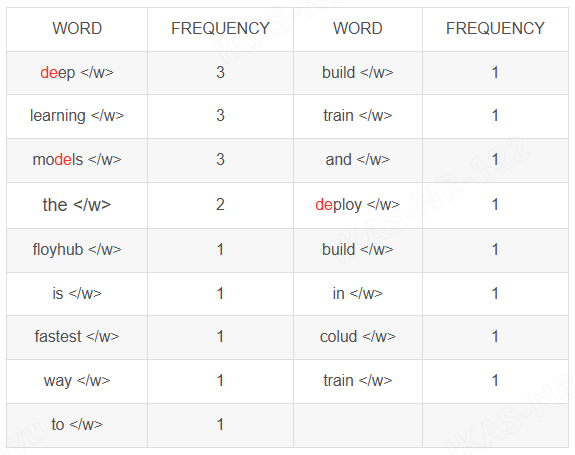
6. 继续迭代直到达到预设的 subwords 词表大小或下一个最高频的字节对出现频率为 1。

通过以上步骤，得到了更加合适的词表，这个词表可能会出现一些不是单词的组合，但是其本身有意义。

##### 生成词汇表

In [1]:
import re
from collections import Counter


def get_stats(vocab):
    """
    统计子词对的出现频率
    """
    pairs = Counter()
    for word, freq in vocab.items():
        symbols = word.split() # 拆分为单个字符
        for i in range(len(symbols) - 1):
            pairs[(symbols[i], symbols[i + 1])] += freq
    return pairs


def merge_vocab(pair, vocab):
    """
    将出现频率最高的子词对合并
    """
    bigram = re.escape(" ".join(pair))
    pattern = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    new_vocab = {}
    for word in vocab:
        new_word = pattern.sub("".join(pair), word) # 替换成子词对
        new_vocab[new_word] = vocab[word]
    return new_vocab


def bpe(corpus, num_merges):
    """
    BPE算法主流程
    """
    # 初始化词汇表：按字符拆分单词，并在末尾添加</w>
    vocab = Counter(" ".join(list(word)) + " </w>" for sentence in corpus for word in sentence.split())
    print("Initial Vocabulary:")
    for word, freq in vocab.items():
        print(f"{word} -> {freq}")
    
    for i in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get) # 频率最高子词对
        vocab = merge_vocab(best_pair, vocab)
        print(f"\nStep {i + 1}: Merged {best_pair}")
        print("Updated Vocabulary:")
        for word, freq in vocab.items():
            print(f"{word} -> {freq}")
    return vocab


if __name__ == "__main__":
    # 输入语料
    corpus = [
        "The quick brown fox jumps over the lazy dog.",
        "A journey of a thousand miles begins with a single step."
    ]
    
    # 应用BPE算法
    final_vocab = bpe(corpus, num_merges=100)
    print(final_vocab)

Initial Vocabulary:
T h e </w> -> 1
q u i c k </w> -> 1
b r o w n </w> -> 1
f o x </w> -> 1
j u m p s </w> -> 1
o v e r </w> -> 1
t h e </w> -> 1
l a z y </w> -> 1
d o g . </w> -> 1
A </w> -> 1
j o u r n e y </w> -> 1
o f </w> -> 1
a </w> -> 2
t h o u s a n d </w> -> 1
m i l e s </w> -> 1
b e g i n s </w> -> 1
w i t h </w> -> 1
s i n g l e </w> -> 1
s t e p . </w> -> 1

Step 1: Merged ('e', '</w>')
Updated Vocabulary:
T h e</w> -> 1
q u i c k </w> -> 1
b r o w n </w> -> 1
f o x </w> -> 1
j u m p s </w> -> 1
o v e r </w> -> 1
t h e</w> -> 1
l a z y </w> -> 1
d o g . </w> -> 1
A </w> -> 1
j o u r n e y </w> -> 1
o f </w> -> 1
a </w> -> 2
t h o u s a n d </w> -> 1
m i l e s </w> -> 1
b e g i n s </w> -> 1
w i t h </w> -> 1
s i n g l e</w> -> 1
s t e p . </w> -> 1

Step 2: Merged ('s', '</w>')
Updated Vocabulary:
T h e</w> -> 1
q u i c k </w> -> 1
b r o w n </w> -> 1
f o x </w> -> 1
j u m p s</w> -> 1
o v e r </w> -> 1
t h e</w> -> 1
l a z y </w> -> 1
d o g . </w> -> 1
A </w> -> 1
j o u r 

##### 分词

In [2]:
import re
import collections

# 获取词频和词汇表的token化
def get_tokens_from_vocab(vocab):
    """
    从词汇表中提取每个token的频率，以及将词汇表中的单词进行token化。

    Args:
    vocab (dict): 词汇表，键是单词，值是该单词的频率

    Returns:
    tokens_frequencies (dict): 每个token的频率
    vocab_tokenization (dict): 每个单词的token化形式
    """
    tokens_frequencies = collections.defaultdict(int)  # 默认频率为0
    vocab_tokenization = {}  # 存储单词对应的tokens
    for word, freq in vocab.items():
        word_tokens = word.split()  # 将单词按空格拆分为tokens
        for token in word_tokens:
            tokens_frequencies[token] += freq  # 计算每个token的频率
        vocab_tokenization[''.join(word_tokens)] = word_tokens  # 记录单词对应的tokens
    return tokens_frequencies, vocab_tokenization

# 测量标记的长度
def measure_token_length(token):
    """
    测量token的实际长度，如果token以'</w>'结尾，计算时包含该标记。

    Args:
    token (str): 输入的token

    Returns:
    int: token的实际长度
    """
    if token[-4:] == '</w>':  # 判断是否以'</w>'结尾
        return len(token[:-4]) + 1  # 去掉'</w>'计算长度，并加上结尾的1
    else:
        return len(token)  # 返回原始长度

# 拆分词
def tokenize_word(string, sorted_tokens, unknown_token='</u>'):
    """
    如果vocab里面找不到要拆分的词，就根据已经有的token现拆

    Args:
    string (str): 要拆分的字符串
    sorted_tokens (list): 已排序的tokens
    unknown_token (str): 未知token的标记，默认为'</u>'

    Returns:
    list: 拆分后的token列表
    """
    if string == '':  # 空字符串直接返回空列表
        return []
    if sorted_tokens == []:  # 如果没有可用的tokens，返回未知标记
        return [unknown_token] * len(string)

    string_tokens = []  # 存储拆分后的tokens
    for i in range(len(sorted_tokens)):
        token = sorted_tokens[i]
        token_reg = re.escape(token.replace('.', '[.]'))  # 转义token中的特殊字符
        
        # 找到所有匹配的token在string中的位置
        matched_positions = [(m.start(0), m.end(0)) for m in re.finditer(token_reg, string)]
        if len(matched_positions) == 0:  # 如果没有匹配的，继续下一个token
            continue
        
        substring_end_positions = [matched_position[0] for matched_position in matched_positions]
        substring_start_position = 0
        
        for substring_end_position in substring_end_positions:
            substring = string[substring_start_position:substring_end_position]  # 提取子字符串
            # 递归处理子字符串，继续匹配剩余的tokens
            string_tokens += tokenize_word(string=substring, sorted_tokens=sorted_tokens[i+1:], unknown_token=unknown_token)
            string_tokens += [token]  # 记录当前匹配的token
            substring_start_position = substring_end_position + len(token)
        
        remaining_substring = string[substring_start_position:]  # 处理剩余部分的字符串
        string_tokens += tokenize_word(string=remaining_substring, sorted_tokens=sorted_tokens[i+1:], unknown_token=unknown_token)
        break
    else:
        # 如果没有找到匹配的token，用未知标记代替
        string_tokens = [unknown_token] * len(string)
    
    return string_tokens

# 排序标记
def sort_tokens(tokens_frequencies):
    """
    按token长度和频率对tokens进行排序。

    Args:
    tokens_frequencies (dict): token频率的字典

    Returns:
    list: 排序后的token列表
    """
    sorted_tokens_tuple = sorted(
        tokens_frequencies.items(), 
        key=lambda item: (measure_token_length(item[0]), item[1]), 
        reverse=True  # 从大到小排序
    )
    sorted_tokens = [token for (token, freq) in sorted_tokens_tuple]  # 提取排序后的token
    return sorted_tokens

# 主分词函数
def tokenize_sentences(vocab, sentence_list):
    """
    根据给定的词汇表对句子列表中的每个句子进行分词。

    Args:
    vocab (dict): 词汇表，包含单词及其频率
    sentence_list (list): 句子列表，每个句子为一个字符串

    Returns:
    final_tokenized_output (list): 每个句子的分词结果，按顺序返回
    """
    # 获取词频和词汇表的token化
    tokens_frequencies, vocab_tokenization = get_tokens_from_vocab(vocab)

    # 按长度和频率排序tokens
    sorted_tokens = sort_tokens(tokens_frequencies)
    
    # 用于存储所有分词结果的列表
    final_tokenized_output = []

    for sentence in sentence_list:
        sentence_tokens = []  # 当前句子的分词结果
        for word in sentence.split():
            word = word + "</w>"  # 给单词添加结尾标记

            # 检查词是否在词汇表中
            if word in vocab_tokenization:
                sentence_tokens += vocab_tokenization[word]
            else:
                sentence_tokens += tokenize_word(string=word, sorted_tokens=sorted_tokens, unknown_token='</u>')

        # 将当前句子的分词结果加入最终的输出列表
        final_tokenized_output.append(sentence_tokens)
        
    # 去掉每个token中的 "</w>"
    cleaned_output = [
        ["".join(token.split("</w>")) for token in sentence_tokens]
        for sentence_tokens in final_tokenized_output]

    return cleaned_output

if __name__ == "__main__":
    # 输入语料
    corpus = [
        "The quick brown fox jumps over the lazy cat.",
        "A journey of a thousand miles begins with a single step."
    ]
    
    # 示例词汇表
    vocab = final_vocab
    
    # 使用封装好的分词函数
    tokenized_output = tokenize_sentences(vocab, corpus)
    print(tokenized_output)

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', '</u>', '</u>', '</u>', '</u>', '</u>', '</u>', '</u>', '</u>'], ['A', 'journey', 'of', 'a', 'thousand', 'miles', 'begins', 'with', 'a', 'single', 'step.']]


#### BBPE

BBPE 可以解决不同语言进行分词时OOV的问题，那它具体时怎么解决的呢？我们来具体讨论一下。

首先，在计算机处理自然语言时，通常通过一些国际通用的编码方式（E.g. ASCII / UTF-8），将各个字符编码成不同长度的二进制/十进制/十六进制编码。

然而，ASCII这套编体系仅能覆盖中英文字符，因此在应用至其他语言时十分受限；相比之下，UTF-8编码创建的本身就是为了将世界上不同的语言字符尽可能全部用一套编码进行编号；同时为了不像UTF-32对于每个字符都采用4位字节编码而过于冗长，改进的UTF-8编码是一个变长的编码，有1～4个范围的字节长度。

例如英文字符基本都是1个字节（byte），中文汉字通常需要2～3个字节，具体如下图所示：

UTF-8使用1~4字节为每个字符编码：

一个US-ASCII字符只需1字节编码（Unicode范围由U+0000\~U+007F）。  
带有变音符号的拉丁文、希腊文、西里尔字母、亚美尼亚语、希伯来文、阿拉伯文、叙利亚文等字母则需要2字节编码（Unicode范围由U+0080\~U+07FF）。  
其他语言的字符（包括中日韩文字、东南亚文字、中东文字等）包含了大部分常用字，使用3字节编码。  
其他极少使用的语言字符使用4字节编码。


BBPE 的核心思想是用byte来构建最基础的词表（BPE是基于字符）。首先将文本按照UTF-8进行编码，每个字符在UTF-8的表示中占据1-4个byte。 在byte序列上再使用BPE算法，进行byte level的相邻合并。

总体来说，BBPE主要通过通过字节层面来实现分词，其优点在于：

1. 不同语言之间字节编码具有互通性，可以实现即使字符集不重叠，也可以通过字节层面的共享来实现良好的迁移，可以更好的处理跨语言问题，有利于模型翻译能力提升。

2. 可以更好的不常见字符的特殊问题（E.g.emoji）。

3. 相比传统的BPE更节省词表空间（同等词表大小效果更好），每个token也能获得更充分的训练。

然而，其也存在不可忽视的缺点：

1. BBPE在通用处理不同语言的同时，会导致每种语言不一定是长度最优的编码方式（E.g. 并不太适合中文编码），必然从长度上会增加推理计算的开销。


#### WordPiece 

Google的Bert模型在分词的时候使用的是WordPiece算法。

与BPE算法类似，WordPiece算法也是每次从词表中选出两个子词合并成新的子词；不过在如何选择两个子词进行合并时，WordPiece算法通过选择“ 能够提升语言模型概率最大的相邻子词”，来选自如何合并子词。
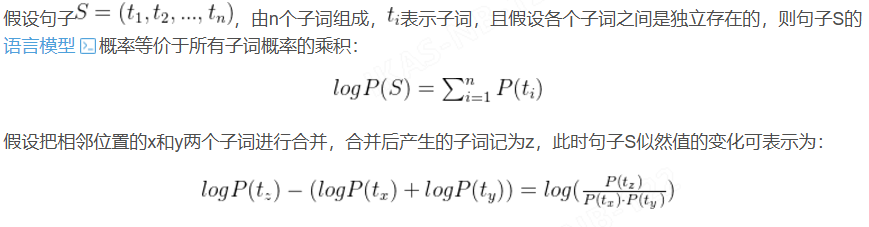
从上面的公式，很容易发现，语言模型概率的变化就是两个子词之间的互信息。

简而言之，WordPiece每次选择合并的两个子词，他们具有最大的互信息值，也就是两子词在语言模型上具有较强的关联性，它们经常在语料中以相邻方式同时出现。

WordPiece 不是简单地选择最频繁出现的词对，而是使用以下公式为每个词对计算得分：

`score = (词对的频率) / (第一个词的频率 × 第二个词的频率)`

通过将词对的频率除以其每一个词的频率的乘积，该算法优先合并那些在词汇表中单独出现频率较低的词所构成的词对。

WordPiece分词算法的过程如下：

1. 准备足够大的训练语料，并确定期望的词表大小；

2. 准备基础词表（E.g. 英文26个字母加上各种符号），WordPiece通过添加前缀（'##'）来识别子词，每个单词最初是通过将前缀添加到单词内的所有字符来拆分的 (E.g. w ##o ##r ##d)；

3. 将语料库中所有单词基于基础词表拆分为最小单元；

4. 使用语言模型（E.g. unigram模型/ bi-gram模型），进行极大似然估计；

5. 从所有可能的subword子词对中选择加入语言模型后能最大程度地增加语言模型概率的子词作为新子词；

6. 重复步骤5，直到达到第2步设定的subword词表大小或语言模型的概率增量低于某一阀值。

WordPiece 的使用范围

典型使用WordPiece模型有：Electra，基于 BERT 的 Transformer （E.g. DistilBERT、MobileBERT、Funnel Transformers 和 MPNET）

总体来说，BPE 与 WordPiece 并没有明显的优劣，各自有各自的特点，阐述如下：

使用频次的 BPE 算法能够获取到更高效的编码方式，类似于哈夫曼编码(Huffman Coding)的思想；而WordPiece由于要进一步计算互信息，每轮合并过程的计算量都比BPE要大，事件复杂度为 O(n* iter_step)；  
相比于 BPE，使用点互信息的 WordPiece 算法能够获取到更高质量的词根；  
从应用上看，Auto-regressive类的模型用的更多的是BPE（需要更高效地生成词），而Auto-Encoding类的模型用的更多的是WordPiece（需要更深入地理解词之间的关系）。


##### 生成词汇表

In [33]:
import re
from collections import Counter, defaultdict

def compute_pair_scores(splits, word_freqs):
    letter_freqs = defaultdict(int)
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            letter_freqs[split[0]] += freq
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            letter_freqs[split[i]] += freq
            pair_freqs[pair] += freq
        letter_freqs[split[-1]] += freq

    scores = {
        pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
        for pair, freq in pair_freqs.items()
    }
    return scores

def merge_pair(a, b, splits, word_freqs):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue
        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                merge = a + b[2:] if b.startswith("##") else a + b
                split = split[:i] + [merge] + split[i + 2:]
            else:
                i += 1
        splits[word] = split
    return splits


def wordpiece(corpus, vocab_size):
    """
    WordPiece算法主流程
    """
    # 初始化词汇表：按字符拆分单词，并在前面加##
    word_freqs = Counter(
        word for sentence in corpus for word in sentence.split())

    alphabet = []
    for word in word_freqs.keys():
        if word[0] not in alphabet:
            alphabet.append(word[0])
        for letter in word[1:]:
            if f"##{letter}" not in alphabet:
                alphabet.append(f"##{letter}")
    vocab = ["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"] + alphabet.copy()

    splits = {
        word: [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
        for word in word_freqs.keys()
    }

    while len(vocab) < vocab_size:
        scores = compute_pair_scores(splits, word_freqs)
        best_pair, max_score = "", None
        for pair, score in scores.items():
            if max_score is None or max_score < score:
                best_pair = pair
                max_score = score
        splits = merge_pair(*best_pair, splits, word_freqs)
        new_token = (
            best_pair[0] + best_pair[1][2:]
            if best_pair[1].startswith("##")
            else best_pair[0] + best_pair[1]
        )
        vocab.append(new_token)

    return vocab


if __name__ == "__main__":
    # 输入语料
    corpus = [
        "The quick brown fox jumps over the lazy dog.",
        "A journey of a thousand miles begins with a single step."
    ]

    # 应用wordpiece算法
    final_vocab = wordpiece(corpus, vocab_size=101)
    print(final_vocab)

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', 'T', '##h', '##e', 'q', '##u', '##i', '##c', '##k', 'b', '##r', '##o', '##w', '##n', 'f', '##x', 'j', '##m', '##p', '##s', 'o', '##v', 't', 'l', '##a', '##z', '##y', 'd', '##g', '##.', 'A', '##f', 'a', '##d', 'm', '##l', 'w', '##t', 's', '##ck', '##mp', 'ov', 'of', 'la', 'laz', 'lazy', '##p.', '##g.', 'Th', 'th', '##th', 'st', 'qu', '##ump', 'jump', 'jumps', '##sa', '##usa', '##ur', 'br', '##gl', 'qui', 'quick', 'mi', 'mil', '##gi', 'wi', 'with', 'si', 'bro', 'brow', 'fo', 'fox', 'do', 'dog.', 'jo', 'jour', '##ousa', 'thousa', 'brown', 'journ', 'thousan', 'thousand', '##gin', 'sin', 'singl', '##gins', 'The', 'ove', 'over', 'the', 'journe', 'journey', 'mile', 'miles', 'be', 'begins']


##### 分词

In [34]:
class WordPieceTokenizer:
    def __init__(self, vocab, unk_token="[UNK]"):
        """
        初始化WordPiece分词器。
        :param vocab: 词汇表，包含所有词和子词。
        :param unk_token: 未知词的替代标记。
        """
        self.vocab = vocab
        self.unk_token = unk_token

    def tokenize(self, text):
        """
        对文本进行分词。
        :param text: 输入文本。
        :return: 子词列表。
        """
        output_tokens = []
        for word in text.split():
            tokens = self._wordpiece_tokenize(word)
            output_tokens.extend(tokens)
        return output_tokens

    def _wordpiece_tokenize(self, word):
        """
        对单个单词进行WordPiece分词。
        :param word: 单个单词。
        :return: 子词列表。
        """
        if word in self.vocab:
            return [word]
        
        sub_tokens = []
        start = 0
        while start < len(word):
            end = len(word)
            cur_substr = None
            while start < end:
                substr = word[start:end]
                if start > 0:
                    substr = "##" + substr  # 子词用"##"前缀标记
                if substr in self.vocab:
                    cur_substr = substr
                    break
                end -= 1

            if cur_substr is None:
                return [self.unk_token]
            
            sub_tokens.append(cur_substr)
            start = end

        return sub_tokens

In [35]:
# 测试
vocab = final_vocab
tokenizer = WordPieceTokenizer(vocab)
text = "The quick brown fox jumps over the lazy cat."
tokens = tokenizer.tokenize(text)
print("分词结果:", tokens)

分词结果: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', '[UNK]']


#### UniLM

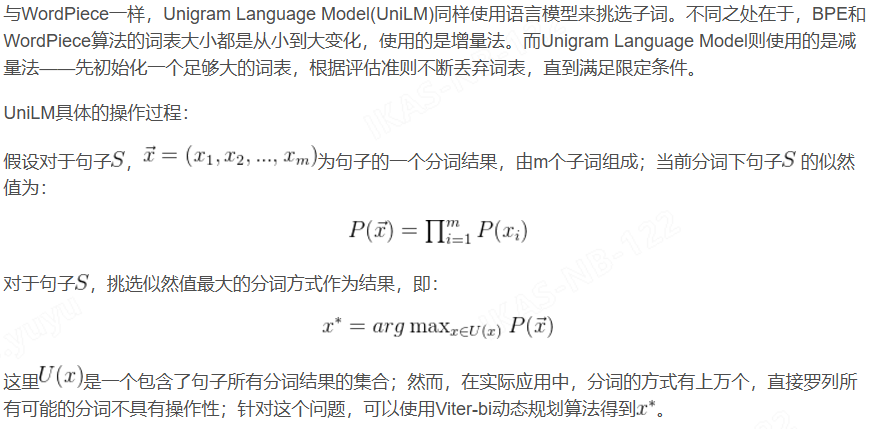
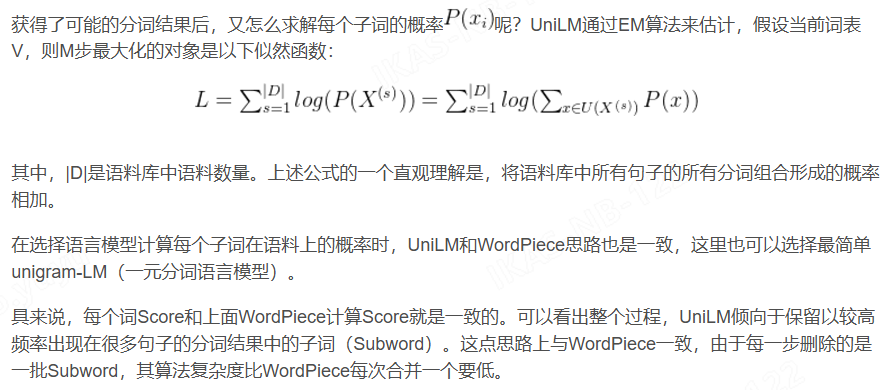

UniLM分词算法的过程如下：

初始时，词表V并不存在，因而，UniLM算法采用不断迭代的方法来构造词表并求解分词概率：

初始时，建立一个足够大的词表。一般，可用语料中的所有字符加上常见的子字符串初始化词表，也可以通过BPE算法初始化；
针对当前词表，采用EM算法求解每个子词在语料上的概率；
对于每个子词，计算当该子词被从词表中移除时，总的loss降低了多少，记为该子词的loss；
将子词按照loss大小进行排序，丢弃一定比例loss最小的子词(比如20%)，保留下来的子词生成新的词表（这里需要注意的是，单字符不能被丢弃，这是为了避免OOV情况）；
重复步骤2到4，直到词表大小减少到设定范围。
可以看出，UniLM会保留那些以较高频率出现在很多句子的分词结果中的子词，因为这些子词如果被丢弃，其损失会很大。


UniLM的使用范围

典型使用WordPiece模型有：AlBERT, T5, mBART, XLNet

总体来说，UniLM使用减量法以及最大化语言模型似然概率来分词，该方法会保留那些以较高频率出现在很多句子的分词结果中的子词；

其考虑了句子的不同分词可能，因而能够输出带概率的多个子词分段；

其算法复杂度比BPE高，而比WordPiece低；

UniLM更多的是用在Seq2Seq的模型中。


### 分词器训练推理

介绍了各种主流分词器的原理之后，我们来看一下分词器的总体训练和推理过程。

Tokenizer包括训练和推理两个环节：

1. 训练阶段指得是从语料中获取一个分词器模型;

2. 推理阶段指的是给定一个句子，基于分词模型切分成一连串的token。

基本的流程如图所示，包括归一化，预分词，基于分词模型的切分，后处理这4个步骤：
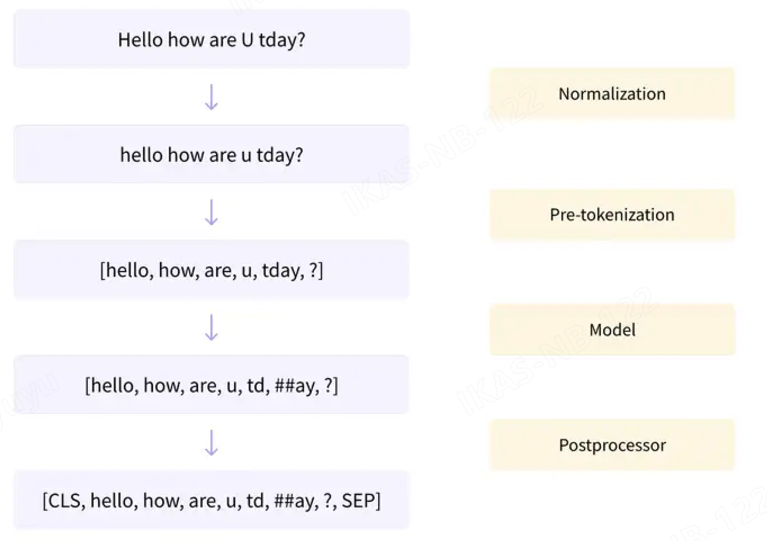


#### 归一化

这是最基础的文本清洗，包括删除多余的换行和空格，转小写，移除音调等。例如：  
input: Héllò hôw are ü?  
normalization: hello how are u?

##### 预分词

预分词阶段会把句子切分成更小的“词”单元。可以基于空格或者标点进行切分。 不同的tokenizer的实现细节不一样。例如：  
input: Hello, how are  you?  
 
pre-tokenize:  
[BERT]: [('Hello', (0, 5)), (',', (5, 6)), ('how', (7, 10)), ('are', (11, 14)), ('you', (16, 19)), ('?', (19, 20))]
 
[GPT2]: [('Hello', (0, 5)), (',', (5, 6)), ('Ġhow', (6, 10)), ('Ġare', (10, 14)), ('Ġ', (14, 15)), ('Ġyou', (15, 19)), ('?', (19, 20))]
 
[t5]: [('▁Hello,', (0, 6)), ('▁how', (7, 10)), ('▁are', (11, 14)), ('▁you?', (16, 20))] 

可以看到BERT的tokenizer就是直接基于空格和标点进行切分。 GPT2也是基于空格和标签，但是空格会保留成特殊字符“Ġ”。 T5则只基于空格进行切分，标点不会切分。并且空格会保留成特殊字符"▁"，并且句子开头也会添加特殊字符"▁"。

##### 基于分词模型的切分

这里指的就是不同分词模型具体的切分方式。分词模型包括上述提到的BPE，WordPiece 和 Unigram 三种分词模型。

#### 后处理

后处理阶段会包括一些特殊的分词逻辑，例如添加sepcial token：[CLS],[SEP]等。

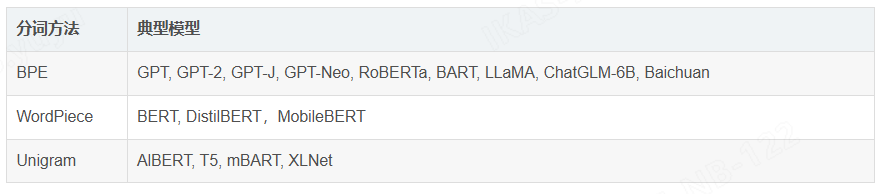

## 英文分词-NLTK

NLTK是构建Python程序以使用人类语言数据的领先平台。 它为50多种语料库和词汇资源（如WordNet）提供了易于使用的界面， 还提供了一套用于分类，标记化，词干化，标记，解析和语义推理的文本处理库。 NLTK是Python上著名的⾃然语⾔处理库 ⾃带语料库，具有词性分类库 ⾃带分类，分词，等等功能。 NLTK被称为“使用Python进行教学和计算语言学工作的绝佳工具”，以及“用自然语言进行游戏的神奇类库”。

### 使用 NLTK 分析单词和句子

#### 安装NLTK

`pip install nltk`

#### 配置NLTK

In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

`import nltk`  
`nltk.download()`  
NLTK 模块将占用大约 7MB，整个nltk_data目录将占用大约 1.8GB，其中包括您的分块器，解析器和语料库。

NLTK git地址：https://github.com/nltk/nltk_data

#### 开始使用 NLTK

手工下载的NLTK数据使用时需要让NLTK知道在什么地方， nltk 模块 data 用来完成这个任务。

In [1]:
import nltk
from nltk import data

data.path.append("../../../../../../Files/nltk_data")
data.path

['C:\\Users\\IKAS/nltk_data',
 'D:\\Anaconda\\nltk_data',
 'D:\\Anaconda\\share\\nltk_data',
 'D:\\Anaconda\\lib\\nltk_data',
 'C:\\Users\\IKAS\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data',
 '../../../../../../Files/nltk_data']

现在你已经拥有了所有你需要的东西，让我们敲一些简单的词汇：

- 语料库（Corpus） - 文本的正文，单数。Corpora 是它的复数。示例：A collection of medical journals。

- 词库（Lexicon） - 词汇及其含义。例如：英文字典。但是，考虑到各个领域会有不同的词库。例如：对于金融投资者来说，Bull （牛市）这个词的第一个含义是对市场充满信心的人，与“普通英语词汇”相比，这个词的第一个含义是动物。因此，金融投资者，医生，儿童，机械师等都有一个特殊的词库。

- 标记（Token） - 每个“实体”都是根据规则分割的一部分。例如，当一个句子被“拆分”成单词时，每个单词都是一个标记。如果您将段落拆分为句子，则每个句子也可以是一个标记。

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [15]:
EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

#### 划分句子

In [16]:
sent_tokenize(EXAMPLE_TEXT)

['Hello Mr. Smith, how are you doing today?',
 'The weather is great, and Python is awesome.',
 'The sky is pinkish-blue.',
 "You shouldn't eat cardboard."]

起初，你可能会认为按照词或句子来分词，是一件相当微不足道的事情。 对于很多句子来说，它可能是。 第一步可能是执行一个简单的.split('. ')，或按照句号，然后是空格分割。 之后也许你会引入一些正则表达式，来按照句号，空格，然后是大写字母分割。 问题是像Mr. Smith这样的事情，还有很多其他的事情会给你带来麻烦。 按照词分割也是一个挑战，特别是在考虑缩写的时候，例如we和we're。 NLTK 用这个看起来简单但非常复杂的操作为您节省大量的时间。

上面的代码会输出句子，分成一个句子列表，你可以用for循环来遍历。

所以这里，我们创建了标记，它们都是句子。

#### 分词

In [6]:
word_tokenize(EXAMPLE_TEXT)

['Hello',
 'Mr.',
 'Smith',
 ',',
 'how',
 'are',
 'you',
 'doing',
 'today',
 '?',
 'The',
 'weather',
 'is',
 'great',
 ',',
 'and',
 'Python',
 'is',
 'awesome',
 '.',
 'The',
 'sky',
 'is',
 'pinkish-blue',
 '.',
 'You',
 'should',
 "n't",
 'eat',
 'cardboard',
 '.']

这里有几件事要注意。 首先，注意标点符号被视为一个单独的标记。 另外，注意单词shouldn't分隔为should和n't。 最后要注意的是，pinkish-blue确实被当作“一个词”来对待，本来就是这样。很酷！

### NLTK 与停止词

#### 停止词的概念

一般来说，计算机使用数字来表示一切事物，但是我们经常直接在编程中看到使用二进制信号（ True 或 False ，可以直接转换为 1 或 0 ， 直接来源于电信号存在 (True, 1) 或不存在 (False, 0) ）。 为此，我们需要一种方法,将单词转换为数值或信号模式。 将数据转换成计算机可以理解的东西，这个过程称为“预处理”。 预处理的主要形式之一就是过滤掉无用的数据。在自然语言处理中，无用词（数据）被称为停止词。

我们可以立即认识到，有些词语比其他词语更有意义。我们也可以看到，有些单词是无用的，是填充词。 例如，我们在英语中使用它们来填充句子，这样就没有那么奇怪的声音了。 一个最常见的，非官方的，无用词的例子是单词 umm 。 人们经常用 umm 来填充，比别的词多一些。 这个词毫无意义，除非我们正在寻找一个可能缺乏自信，困惑，或者说没有太多话的人。 我们都这样做，有…呃…很多时候，你可以在视频中听到我说 umm 或 uhh 。 对于大多数分析而言，这些词是无用的。

我们不希望这些词占用我们数据库的空间，或占用宝贵的处理时间。 因此，我们称这些词为“无用词”，因为它们是无用的，我们希望对它们不做处理。 “停止词”这个词的另一个版本可以更书面一些：我们停在上面的单词。

#### 在 NLTK 中使用停止词

In [18]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english')) # 所有英文停止词

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

以下是结合使用stop_words集合，从文本中删除停止词的方法：

In [22]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if w not in stop_words]

print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


### NLTK 英文词干提取

词干的概念是一种规范化方法。除涉及时态之外，许多词语的变体都具有相同的含义。

我们提取词干的原因是为了缩短查找的时间，使句子正常化。

考虑：

I was taking a ride in the car. I was riding in the car.

In [23]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

现在让我们选择一些带有相似词干的单词，例如：

In [26]:
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]

下面，我们可以这样做来轻易提取词干：

In [28]:
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


现在让我们尝试对一个典型的句子，而不是一些单词提取词干：

In [29]:
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."
words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

it
is
import
to
by
veri
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc
.


### NLTK 词性标注

NLTK模块的一个更强大的方面是，它可以为你做词性标注。 意思是把一个句子中的单词标注为名词，形容词，动词等。 更令人印象深刻的是，它也可以按照时态来标记，以及其他。 这是一列标签，它们的含义和一些例子：

POS tag list:  
|词性|解释|
|-----|-----|
|CC|coordinating conjunction|
|CD|cardinal digit|
|DT|determiner|
|EX|existential there (like: “there is” … think of it like “there exists”)|
|FW|foreign word|
|IN|preposition/subordinating conjunction|
|JJ|adjective ‘big’|
|JJR|adjective, comparative ‘bigger’|
|JJS|adjective, superlative ‘biggest’|
|LS|list marker 1)|
|MD|modal could, will|
|NN|noun, singular ‘desk’|
|NNS|noun plural ‘desks’|
|NNP|proper noun, singular ‘Harrison’|
|NNPS|proper noun, plural ‘Americans’|
|PDT|predeterminer ‘all the kids’|
|POS|possessive ending parent’s|
|PRP|personal pronoun I, he, she|
|PRP＄|possessive pronoun my, his, hers|
|RB|adverb very, silently,|
|RBR|adverb, comparative better|
|RBS|adverb, superlative best|
|RP|particle give up|
|TO|to go ‘to’ the store.|
|UH|interjection errrrrrrrm|
|VB|verb, base form take|
|VBD|verb, past tense took|
|VBG|verb, gerund/present participle taking|
|VBN|verb, past participle taken|
|VBP|verb, sing. present, non-3d take|
|VBZ|verb, 3rd person sing. present takes|
|WDT|wh-determiner which|
|WP|wh-pronoun who, what|
|WP＄|possessive wh-pronoun whose|
|WRB|wh-abverb where, when|

我们如何使用这个？ 当我们处理它的时候，我们要讲解一个新的句子标记器，叫做PunktSentenceTokenizer。 这个标记器能够无监督地进行机器学习，所以你可以在你使用的任何文本上进行实际的训练。 首先，让我们获取一些我们打算使用的导入：

In [30]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

现在让我们创建训练和测试数据，使用state_union语料库阅读器：

In [31]:
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

一个是 2005 年以来的国情咨文演说，另一个是 2006 年以来的乔治·W·布什总统的演讲。

接下来，我们可以训练 Punkt 标记器，如下所示：

In [32]:
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

之后我们可以实际分词，使用：

In [33]:
tokenized = custom_sent_tokenizer.tokenize(sample_text)

现在我们可以通过创建一个函数，来完成这个词性标注脚本，该函数将遍历并标记每个句子的词性，如下所示：

In [34]:
def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

输出应该是元组列表，元组中的第一个元素是单词，第二个元素是词性标签。

### NLTK 朴素贝叶斯分类器

In [38]:
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:3000]


def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features


featuresets = [(find_features(rev), category) for (rev, category) in documents]
training_set = featuresets[:1900]
testing_set = featuresets[1900:]

In [41]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [42]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 77.0


接下来，我们可以进一步了解正面或负面评论中最有价值的词汇：

In [43]:
classifier.show_most_informative_features(15)

Most Informative Features
                 idiotic = True              neg : pos    =     12.1 : 1.0
                  annual = True              pos : neg    =     10.7 : 1.0
               atrocious = True              neg : pos    =     10.5 : 1.0
                   sucks = True              neg : pos    =      9.5 : 1.0
                 frances = True              pos : neg    =      9.3 : 1.0
           unimaginative = True              neg : pos    =      7.5 : 1.0
                 cunning = True              pos : neg    =      7.0 : 1.0
                  sexist = True              neg : pos    =      6.9 : 1.0
             silverstone = True              neg : pos    =      6.9 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
              schumacher = True              neg : pos    =      6.7 : 1.0
                    mena = True              neg : pos    =      6.3 : 1.0
                  shoddy = True              neg : pos    =      6.3 : 1.0

## 中文分词-jieba

NLP（自然语言）领域现在可谓是群雄纷争，各种开源组件层出不穷，其中一支不可忽视的力量便是jieba分词，号称要做最好的 Python 中文分词组件。

“最好的”这三个字可不是空穴来风，jieba在开源社区的受欢迎程度非常之高。

支持繁体分词

支持自定义词典

MIT 授权协议

jieba项目目前的github star数已经达到24k，其他热门分词组件像HanLP star数20k、ansj_seg star数5.6k、pkuseg-python star数5k。 可见jieba已经稳居中文分词领域c位。

jieba的主要功能是做中文分词，可以进行简单分词、并行分词、命令行分词，当然它的功能不限于此， 目前还支持关键词提取、词性标注、词位置查询等。

更让人愉悦的是jieba虽然立足于python，但同样支持其他语言和平台， 诸如：C++、Go、R、Rust、Node.js、PHP、 iOS、Android等。 所以jieba能满足各类开发者的需求。

### 安装jieba 

`pip install jieba`

### jieba分词

为了让计算机更容易理解文本，通常中文信息处理的第一步是中文分词。中文分词是在中文句子中的词与词之间加上边界标记。

支持 4 种分词模式：

- 精确模式：试图将句子 最精确地切开 ，适合文本分析。

- 全模式：把句子中 所有可以成词的词语都扫描出来 ，速度非常快，但是不能解决歧义。

- 搜索引擎模式： 在精确模式的基础上，对长词再次切分 ，提高召回率，适合用于搜索引擎分词。

- paddle模式: 不必安装额外类库，可直接在 jieba 中使用。

In [46]:
import jieba

str_text = '我来到北京清华大学'
print(str)
print('精确模式：', jieba.lcut(str_text))
print('全模式：', jieba.lcut(str_text, cut_all=True))
print('搜索引擎模式：', jieba.lcut_for_search(str_text))
print('paddle模式：', jieba.lcut(str_text, use_paddle=True))

Building prefix dict from the default dictionary ...


<class 'str'>


Dumping model to file cache C:\Users\IKAS\AppData\Local\Temp\jieba.cache
Loading model cost 0.874 seconds.
Prefix dict has been built successfully.


精确模式： ['我', '来到', '北京', '清华大学']
全模式： ['我', '来到', '北京', '清华', '清华大学', '华大', '大学']
搜索引擎模式： ['我', '来到', '北京', '清华', '华大', '大学', '清华大学']
paddle模式： ['我', '来到', '北京', '清华大学']


函数说明
- jieba.cut 方法接受四个输入参数: 需要分词的字符串； cut_all 参数用来控制是否采用全模式； HMM 参数用来控制是否使用 HMM 模型； use_paddle 参数用来控制是否使用paddle分词模式，paddle模式采用延迟加载方式，通过enable_paddle接口安装paddlepaddle-tiny，并且 import 相关代码；

- jieba.cut_for_search 方法接受两个参数：需要分词的字符串；是否使用 HMM 模型。该方法适合用于搜索引擎构建倒排索引的分词，粒度比较细。待分词的字符串可以是 unicode 或 UTF-8 字符串、GBK 字符串。注意：不建议直接输入 GBK 字符串，可能无法预料地错误解码成 UTF-8

- jieba.cut 以及 jieba.cut_for_search 返回的结构都是一个可迭代的 generator，可以使用 for 循环来获得分词后得到的每一个词语(unicode)，或者用 jieba.lcut 以及 jieba.lcut_for_search 直接返回列表

- jieba.Tokenizer(dictionary=DEFAULT_DICT) 新建自定义分词器，可用于同时使用不同词典。 jieba.dt 为默认分词器，所有全局分词相关函数都是该分词器的映射。

In [47]:
import jieba, math
import jieba.analyse

str_text="长春地处中国东北地区，位于东北的地理中心，别称北国春城。"

全模式 cut_all=True ：

In [49]:
str_quan1 = jieba.cut(str_text, cut_all=True)
print('全模式分词：{ %d}' % len(list(str_quan1)))
str_quan2=jieba.cut(str_text,cut_all=True)
print("/".join(str_quan2))

全模式分词：{ 19}
长春/春地/地处/中国/东北/东北地区/北地/地区/，/位于/东北/的/地理/中心/，/别称/北国/春城/。


精准模式cut_all=False

In [50]:
str_jing1 = jieba.cut(str_text, cut_all=False)
print('精准模式分词：{ %d}' % len(list(str_jing1)))
str_jing2 = jieba.cut(str_text, cut_all=False)
print("/".join(str_jing2))

精准模式分词：{ 15}
长春/地处/中国/东北地区/，/位于/东北/的/地理/中心/，/别称/北国/春城/。


搜索引擎模式 cut_for_search ：

In [51]:
str_soso1 = jieba.cut_for_search(str_text)
print('搜索引擎分词：{ %d}' % len(list(str_soso1)))
str_soso2 = jieba.cut_for_search(str_text)
print("/".join(str_soso2))

搜索引擎分词：{ 18}
长春/地处/中国/东北/北地/地区/东北地区/，/位于/东北/的/地理/中心/，/别称/北国/春城/。


使用paddle模式 use_paddle=True ：

In [52]:
seg_list = jieba.cut(str_text, use_paddle=True)
print('Paddle 模式分词：{ %d}' % len(list(seg_list)))
seg_list2 = jieba.cut(str_text, use_paddle=True)
print('/'.join(list(seg_list2)))

Paddle 模式分词：{ 15}
长春/地处/中国/东北地区/，/位于/东北/的/地理/中心/，/别称/北国/春城/。


In [53]:
str_text = '''其一，中国的城市，包括直辖市、副省级市、普通地级市、县级市，但不包括县。

正如《中国城市大趋势》一书所分析的，县与县级市虽然级别相同，但定位有巨大差别。县是以农业为基础的管理单元，县级市则以工商业为主。

对于县，地级市进行直管；对于县级市，地级市则只是代管。

名义之别，导致了县级市与其所在地级市，均被视为独立城市，从而单薄市级层面的人口规模，如昆山与苏州，晋江与泉州，义乌与金华。

其二，衡量城市规模，看的是城区人口，而非全市人口。

城区人口，顾名思义，不包括镇区及乡村人口，明显低于全市常住人口。城区人口占全市人口比例最高可达9成以上，最低甚至不到20%。

凡是城镇化率不高的地区，或者下辖县乡过多的城市，即使全市人口迈过了千万大关，也未必能晋级为超大特大城市。

02

7个超大城市：4大一线+成渝津

超大城市，是我国城市规模层级的金字塔尖城市。

目前，我国共有7个超大城市，除了北上广深四大一线城市，还有重庆、天津两大直辖市，以及成都。'''

print(jieba.lcut(str_text))

['其一', '，', '中国', '的', '城市', '，', '包括', '直辖市', '、', '副', '省级', '市', '、', '普通', '地级市', '、', '县级市', '，', '但', '不', '包括', '县', '。', '\n', '\n', '正如', '《', '中国', '城市', '大', '趋势', '》', '一书', '所', '分析', '的', '，', '县', '与', '县级市', '虽然', '级别', '相同', '，', '但', '定位', '有', '巨大', '差别', '。', '县', '是', '以', '农业', '为', '基础', '的', '管理', '单元', '，', '县级市', '则', '以', '工商业', '为主', '。', '\n', '\n', '对于', '县', '，', '地级市', '进行', '直管', '；', '对于', '县级市', '，', '地级市', '则', '只是', '代管', '。', '\n', '\n', '名义', '之别', '，', '导致', '了', '县级市', '与其', '所在', '地级市', '，', '均', '被', '视为', '独立', '城市', '，', '从而', '单薄', '市级', '层面', '的', '人口', '规模', '，', '如', '昆山', '与', '苏州', '，', '晋江', '与', '泉州', '，', '义乌', '与', '金华', '。', '\n', '\n', '其二', '，', '衡量', '城市', '规模', '，', '看', '的', '是', '城区', '人口', '，', '而', '非', '全市', '人口', '。', '\n', '\n', '城区', '人口', '，', '顾名思义', '，', '不', '包括', '镇区', '及', '乡村人口', '，', '明显', '低于', '全市', '常住人口', '。', '城区', '人口', '占', '全市', '人口比例', '最高', '可达', '9', '成', '以上', '，', '最低', '甚至', '不到', '20%', '。', '\n'

### 关键词抽取（核心词抽取）

关键词抽取就是从文本里面把跟这篇文档意义最相关的一些词抽取出来。这个可以追溯到文献检索初期，当时还不支持全文搜索的时候，关键词就可以作为搜索这篇论文的词语。 这是对论文进行标识的重要方法，目前依然可以在论文中看到关键词这一项。

除了这些，关键词还可以在文本聚类、分类、自动摘要等领域中有着重要的作用。 比如在聚类时将关键词相似的几篇文档看成一个团簇，可以大大提高聚类算法的收敛速度； 从某天所有的新闻中提取出这些新闻的关键词，就可以大致了解那天发生了什么事情； 或者将某段时间内几个人的微博拼成一篇长文本，然后抽取关键词就可以知道他们主要在讨论什么话题。

总之，关键词就是最能够反映出文本主题或者意思的词语。但是网络上写文章的人不会像写论文那样告诉你本文的关键词是什么，这个时候就需要利用计算机自动抽取出关键词，算法的好坏直接决定了后续步骤的效果。

关键词抽取从方法来说大致有两种：

- 第一种是关键词分配，就是有一个给定的关键词库，然后新来一篇文档，从词库里面找出几个词语作为这篇文档的关键词；

- 第二种是关键词抽取，就是新来一篇文档，从文档中抽取一些词语作为这篇文档的关键词；

目前大多数领域无关的关键词抽取算法（领域无关算法的意思就是无论什么主题或者领域的文本都可以抽取关键词的算法）和它对应的库都是基于后者的。 从逻辑上说，后者比前着在实际使用中更有意义。

从算法的角度来看，关键词抽取算法主要有两类：

- **有监督学习算法**，将关键词抽取过程视为二分类问题，先抽取出候选词，然后对于每个候选词划定标签，要么是关键词，要么不是关键词，然后训练关键词抽取分类器。当新来一篇文档时，抽取出所有的候选词，然后利用训练好的关键词抽取分类器，对各个候选词进行分类，最终将标签为关键词的候选词作为关键词；

- **无监督学习算法**，先抽取出候选词，然后对各个候选词进行打分，然后输出topK个分值最高的候选词作为关键词。根据打分的策略不同，有不同的算法，例如TF-IDF，TextRank等算法；

jieba分词系统中实现了两种关键词抽取算法，分别是基于TF-IDF关键词抽取算法和基于TextRank关键词抽取算法，两类算法均是无监督学习的算法。 下面将会通过实例讲解介绍如何使用jieba分词的关键词抽取接口以及通过源码讲解其实现的原理。

#### 基于TF-IDF算法进行关键词抽取

`jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=())`

- sentence 为待提取的文本

- topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20

- withWeight 为是否一并返回关键词权重值，默认值为 False

- allowPOS 仅包括指定词性的词，默认值为空，即不筛选

`jieba.analyse.TFIDF(idf_path=None)`

新建 TFIDF 实例，idf_path 为 IDF 频率文件

In [54]:
import jieba, math
import jieba.analyse

str_text = """线程（英语：thread）是操作系统能够进行运算调度的最小单位。
它被包含在进程之中，是进程中的实际运作单位。一条线程指的是进程中一个
单一顺序的控制流，一个进程中可以并发多个线程，每条线程并行执行不同的
任务。在Unix System V及SunOS中也被称为轻量进程（lightweight processes），
但轻量进程更多指内核线程（kernel thread），而把用户线程（user thread）称为线程。
"""
keywords1 = jieba.analyse.extract_tags(str_text)
print('关键词提取：' + "/".join(keywords1))

keywords_top = jieba.analyse.extract_tags(str_text, topK=3)
print('关键词topk：' + "/".join(keywords_top))  #有时不确定提取多少关键词，可利用总词的百分比

print('总词数：{}'.format(len(list(jieba.cut(str_text)))))

total = len(list(jieba.cut(str_text)))

get_cnt = math.ceil(total * 0.1)  #向上取整
print('从%d 中取出%d 个词' % (total, get_cnt))

keywords_top1 = jieba.analyse.extract_tags(str_text, topK=get_cnt)
print('关键词topk：' + "/".join(keywords_top1))

关键词提取：线程/进程/thread/轻量/控制流/并行执行/Unix/System/SunOS/lightweight/processes/kernel/user/单位/多指/内核/称为/并发/操作系统/每条
关键词topk：线程/进程/thread
总词数：109
从109 中取出11 个词
关键词topk：线程/进程/thread/轻量/控制流/并行执行/Unix/System/SunOS/lightweight/processes


#### 基于TextRank算法进行关键词抽取

`jieba.analyse.textrank(sentence, topK=20, withWeight=False, allowPOS=(ns, n, vn, v))` 直接使用，接口相同，注意默认过滤词性。

- sentence：待提取关键词的文本

- topK：返回关键词的数量，重要性从高到低排序

- withWeight：是否同时返回每个关键词的权重

- allowPOS：词性过滤，为空表示不过滤，若提供则仅返回符合词性要求的关键词, allowPOS(ns, n, vn, v) 对应 地名、名词、动名词、动词

`jieba.analyse.TextRank()`  
新建自定义 TextRank 实例

基本思想:

- 将待抽取关键词的文本进行分词

- 以固定窗口大小(默认为5，通过span属性调整)，词之间的共现关系，构建图

- 计算图中节点的PageRank，注意是无向带权图

引入TextRank关键词抽取接口：

In [55]:
for x, w in jieba.analyse.textrank(str_text, withWeight=True):
    print('%s %s' % (x, w))

进程 1.0
线程 0.7470505535857219
单位 0.38800337922730044
运算 0.34027047401967436
调度 0.33931684198043416
轻量 0.31102185714719194
运作 0.30959463951292987
进行 0.26874515685837774
能够 0.2660654985282964
实际 0.24067886508987982
控制流 0.23990311306688275
称为 0.236108598329124
内核 0.236108598329124
并发 0.16886282860541446
顺序 0.14763535550073484
包含 0.10572734204245057
用户 0.10390537624323205


### jieba词性标注

- `jieba.posseg.POSTokenizer(tokenizer=None)` 新建自定义分词器， tokenizer 参数可指定内部使用的 jieba.Tokenizer 分词器。jieba.posseg.dt 为默认词性标注分词器。

- 标注句子分词后每个词的词性，采用和 ictclas 兼容的标记法。

- 除了jieba默认分词模式，提供paddle模式下的词性标注功能。paddle模式采用延迟加载方式，通过 enable_paddle() 安装 paddlepaddle-tiny ，并且 import 相关代码；

paddle模式词性标注对应表如下：

paddle模式词性和专名类别标签集合如下表，其中词性标签 24 个（小写字母），专名类别标签 4 个（大写字母）。

|标签|含义|
|---|---|
|n|普通名词|
|f|方位名词
|s|处所名词
|t|时间
|nr|人名
|ns|地名
|nt|机构名
|nw|作品名
|nz|其他专名
|v|普通动词
|vd|动副词
|vn|名动词
|a|形容词
|ad|副形词
|an|名形词
|d|副词
|m|数量词
|q|量词
|r|代词
|p|介词
|c|连词
|u|助词
|xc|其他虚词
|w|标点符号
|PER|人名

In [56]:
import jieba.posseg as jp

print(jp.lcut('转载<请>附上原文出处链接及本声明.'))

[pair('转载', 'v'), pair('<', 'x'), pair('请', 'v'), pair('>', 'x'), pair('附上', 'f'), pair('原文', 'n'), pair('出处', 'v'), pair('链接', 'n'), pair('及', 'c'), pair('本', 'r'), pair('声明', 'n'), pair('.', 'x')]


In [57]:
from jieba import enable_paddle, posseg

s = '我今天来到l北京的清华大学。'
print('精确模式：')
print(posseg.lcut(s))

精确模式：
[pair('我', 'r'), pair('今天', 't'), pair('来到', 'v'), pair('l', 'x'), pair('北京', 'ns'), pair('的', 'uj'), pair('清华大学', 'nt'), pair('。', 'x')]


In [58]:
print('paddle模式：')
print(posseg.lcut(s, use_paddle=True))

paddle模式：
[pair('我', 'r'), pair('今天', 't'), pair('来到', 'v'), pair('l', 'x'), pair('北京', 'ns'), pair('的', 'uj'), pair('清华大学', 'nt'), pair('。', 'x')]


In [59]:
s = '''其一，中国的城市，包括直辖市、副省级市、普通地级市、县级市，但不包括县。

正如《中国城市大趋势》一书所分析的，县与县级市虽然级别相同，但定位有巨大差别。县是以农业为基础的管理单元，县级市则以工商业为主。

对于县，地级市进行直管；对于县级市，地级市则只是代管。

名义之别，导致了县级市与其所在地级市，均被视为独立城市，从而单薄市级层面的人口规模，如昆山与苏州，晋江与泉州，义乌与金华。

其二，衡量城市规模，看的是城区人口，而非全市人口。

城区人口，顾名思义，不包括镇区及乡村人口，明显低于全市常住人口。城区人口占全市人口比例最高可达9成以上，最低甚至不到20%。

凡是城镇化率不高的地区，或者下辖县乡过多的城市，即使全市人口迈过了千万大关，也未必能晋级为超大特大城市。

02

7个超大城市：4大一线+成渝津

超大城市，是我国城市规模层级的金字塔尖城市。

目前，我国共有7个超大城市，除了北上广深四大一线城市，还有重庆、天津两大直辖市，以及成都。'''

results = posseg.lcut(s)

对于结果中的每一项，其有属性 flag 与 word 。 通过这种方式可以过滤出与地点相关的要素。

In [60]:
for obj in results:
    if obj.flag == 'ns':
        print(obj.word)

中国
城市
中国
城市
城市
昆山
苏州
晋江
泉州
城市
镇区
城市
大关
特大城市
城市
城市
城市
城市
城市
城市
重庆
天津
成都


尽管jieba分词可以自动提取文本中相关的信息，但是由于自然语言的复杂性与非严谨性，得到的结果并非完全可信， 需要根据场景对结果进行分析与处理。

### jieba添加自定义词典

开发者可以指定自己自定义的词典，以便包含 jieba 词库里没有的词。虽然 jieba 有新词识别能力，但是自行添加新词来增强歧义纠错能力

#### 通过词典文件载入自定义词典

创建一个dict.txt，然后写入你的分词,一个词占一行；每一行分三部分：词语、词频（可省略）、词性（可省略），用空格隔开，顺序不可颠倒。file_name 若为路径或二进制方式打开的文件，则文件必须为 UTF-8 编码。

词频省略时使用自动计算的能保证分出该词的词频。

dict.txt内容例如：

必应输入法  
微软亚洲研究院  
新一代  
拼音输入法

在分词前通过 `jieba.load_userdict(file_name)` 来加载分词字典，file_name 为文件类对象或自定义词典的路径。

In [62]:
text1="必应输入法官方版是微软亚洲研究院推出的新一代拼音输入法."
words = jieba.cut(text1)
print('载入自定义词典前：','/'.join(words))

载入自定义词典前： 必/应/输入法/官方版/是/微软/亚洲/研究院/推出/的/新一代/拼音输入/法/.


加载词典文件，重新运行

In [63]:
jieba.load_userdict("../data/dict.txt")
words2 = jieba.cut(text1)
print('载入自定义词典后：','/'.join(words2))

载入自定义词典后： 必应输入法/官方版/是/微软亚洲研究院/推出/的/新一代/拼音输入法/.


#### 词频的作用

频率越高，成词的概率就越大。比如”江州市长江大桥”，既可以是”江州/市长/江大桥“，也可以是”江州/市/长江大桥“。

假设要保证第一种划分的话，我们需要保证P(江州)_P(市长)_P(江大桥）> P(江州)_P(市)_P(长江大桥)

#### 在程序中动态修改词典

添加词汇，通过函数 `add_word(word, freq=None, tag=None)` ：

In [64]:
text2 = '双十一已经不单单是光棍节了。'
words3 = jieba.cut(text2)
print('添加自定义词之前：', '/'.join(words3))

添加自定义词之前： 双十/一/已经/不单单是/光棍节/了/。


In [65]:
jieba.add_word("双十一")  #添加自定义词
words4 = jieba.cut(text2)
print('添加自定义词后：', '/'.join(words4))

添加自定义词后： 双十一/已经/不单单是/光棍节/了/。


删除词汇，通过 `del_word(word)` ：

In [66]:
jieba.del_word("双十一")  #删除自定义词
words5 = jieba.cut(text2)
print('删除自定义词后：', '/'.join(words5))

删除自定义词后： 双十/一/已经/不单单是/光棍节/了/。


## BertTokenizer

### 中文分词

BERT 有专门用于中文文本的分词器。对于中文，BERT 使用的是 WordPiece 分词技术，是基于字级别的。在中文的情况下，BERT 会将中文句子拆分为中文词汇或子词单元（subwords），这些单元是基于 BERT 训练时使用的词表来进行的。

Hugging Face 提供的 transformers 库包含了适用于中文的 BERT 分词器。通过指定适当的模型（如 bert-base-chinese），你可以使用中文的 BERT 分词器。

In [32]:
from transformers import BertTokenizer

# 加载中文BERT分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')

# 输入中文文本
texts = ["我爱机器学习", "深度学习很有意思"]

# 使用分词器将文本转换为token IDs
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# 打印token IDs和对应的token
print("Token IDs:", inputs['input_ids'])
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][1]))

Token IDs: tensor([[ 101, 2769, 4263, 3322, 1690, 2110,  739,  102,    0,    0],
        [ 101, 3918, 2428, 2110,  739, 2523, 3300, 2692, 2590,  102]])
Tokens: ['[CLS]', '我', '爱', '机', '器', '学', '习', '[SEP]', '[PAD]', '[PAD]']
Tokens: ['[CLS]', '深', '度', '学', '习', '很', '有', '意', '思', '[SEP]']


### 英文分词

In [33]:
from transformers import BertTokenizer

# 加载中文BERT分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 输入中文文本
texts = ["Hello, how are you?", "I am fine."]

# 使用分词器将文本转换为token IDs
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

# 打印token IDs和对应的token
print("Token IDs:", inputs['input_ids'])
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][1]))

Token IDs: tensor([[ 101, 7592, 1010, 2129, 2024, 2017, 1029,  102],
        [ 101, 1045, 2572, 2986, 1012,  102,    0,    0]])
Tokens: ['[CLS]', 'hello', ',', 'how', 'are', 'you', '?', '[SEP]']
Tokens: ['[CLS]', 'i', 'am', 'fine', '.', '[SEP]', '[PAD]', '[PAD]']


## SentencePiece

SentencePiece 是一种无监督的文本 tokenizer 和 detokenizer，主要用于基于神经网络的文本生成系统，其中，词汇量在神经网络模型训练之前就已经预先确定了。 SentencePiece 实现了subword单元（例如，字节对编码 (BPE)）和 unigram 语言模型），并可以直接从原始句子训练字词模型(subword model)。 这使得我们可以制作一个不依赖于特定语言的预处理和后处理的纯粹的端到端系统。

SentencePiece 技术优势

- 纯数据驱动：SentencePiece 从句子中训练 tokenization 和 detokenization 模型。 并不总是需要Pre-tokenization(Moses tokenizer/MeCab/KyTea) 。
- 独立于语言：SentencePiece 将句子视为 Unicode 字符序列。 没有依赖于语言的逻辑。多子词算法：支持 BPE 和 unigram 语言模型。
- 子词正则化：SentencePiece 实现子词正则化和 BPE-dropout 的子词采样，有助于提高 NMT 模型的鲁棒性和准确性。
- 快速且轻量级：分割速度约为 50k 句子/秒，内存占用约为 6MB。
- Self-contained：只要使用相同的模型文件，就可以获得相同的tokenization/detokenization。
- 直接词汇 ID 生成：SentencePiece 管理词汇到 ID 的映射，可以直接从原始句子生成词汇 ID 序列。
- 基于 NFKC 的 normalization：SentencePiece 执行基于 NFKC 的文本 normalization。

### 数据准备

1. 准备训练数据  
SentencePiece 需要使用一个大文本文件作为训练数据。例如，创建一个文本文件 text.txt：

In [21]:
import os

def loader(folder_paths, output_file):
    """
    合并多个文件夹中的 .txt 文件内容到一个输出文件中。如果输出文件已存在，则不做任何操作。
    :param folder_paths: 包含文件夹路径的列表
    :param output_file: 合并后的输出文件路径
    :return: None
    """
    # 如果输出文件存在，不执行任何操作
    if os.path.exists(output_file):
        print(f"输出文件已存在: {output_file}，未执行任何操作。")
        return

    missing_folders = []  # 用于记录不存在的文件夹
    processed_files = 0  # 统计已处理的文件数

    # 打开输出文件，准备写入
    with open(output_file, 'w', encoding='utf-8') as output_f:
        # 遍历所有文件夹路径
        for folder_path in folder_paths:
            # 检查文件夹路径是否存在
            if os.path.exists(folder_path):
                # 遍历文件夹中的所有文件
                for filename in os.listdir(folder_path):
                    # 只处理 .txt 文件
                    if filename.endswith('.txt'):
                        file_path = os.path.join(folder_path, filename)
                        try:
                            # 打开每个 .txt 文件并读取内容
                            with open(file_path, 'r', encoding='utf-8') as input_f:
                                # 将文件内容写入输出文件
                                output_f.write(input_f.read())
                                output_f.write("\n")  # 添加换行符
                                processed_files += 1
                        except Exception as e:
                            print(f"读取文件出错: {file_path}, 错误信息: {e}")
            else:
                missing_folders.append(folder_path)

    # 输出统计信息
    if missing_folders:
        print(f"以下文件夹不存在: {', '.join(missing_folders)}")
    print(f"合并完成，处理了 {processed_files} 个文件，保存为: {output_file}")

In [22]:
# 文件夹路径列表
folder_paths = ['../../../../../data/03.nlp/aclImdb/train/neg/', '../../../../../data/03.nlp/aclImdb/train/pos/']
# 输出文件路径
output_file = '../../../../../data/03.nlp/aclImdb/combined_texts.txt'
loader(folder_paths, output_file)

输出文件已存在: ../../../../../data/03.nlp/aclImdb/combined_texts.txt，未执行任何操作。


### 生成词汇表

2. 训练 SentencePiece 模型  
使用 sentencepiece 库训练一个分词模型（例如 BPE 模型）：

In [23]:
import sentencepiece as spm

# 训练模型
spm.SentencePieceTrainer.train(
    input='../../../../../data/03.nlp/aclImdb/combined_texts.txt',  # 输入文本文件
    model_prefix='../data/sentencepiece',  # 输出模型文件前缀
    vocab_size=32000, # 词汇表大小
    model_type='bpe',  # 模型类型：bpe, unigram, char, word
    max_sentence_length=10000  # 每句的最大长度
)

常见配置选项  
在训练模型时，可以根据需求调整一些配置参数：
 
input: 本地文件路径  
model_type: 模型类型，常用 bpe 或 unigram。  
vocab_size: 词汇表大小，通常选择 8000-32000。  
character_coverage: 覆盖的字符集比例，常用于多语言文本中。例如：  
英语常用值：1.0（覆盖所有字符）。  
日语常用值：0.995（忽略罕见字符）。  
input_sentence_size: 用于训练的句子数量。  
shuffle_input_sentence: 是否对输入句子打乱。

### 分词

3. 加载模型并分词  
加载已训练的模型并对句子进行分词：

In [17]:
import sentencepiece as spm

# 加载模型
sp = spm.SentencePieceProcessor(model_file='../data/sentencepiece.model')

# 分词
text = """The third movie produced by Howard Hughes, this gem was thought to be lost. It was recently restored and shown on TCM (12/15/04). The plot is a familiar one - two WW I soldiers escape from a German prison camp (guarded by an extremely lethargic German shepherd, who practically guides them out of the camp), stow away on a ship, and end up in "Arabia", where they rescue the lovely Mary Astor. The restoration is very good overall, although there are two or three very rough sequences. The production is very good, and there are some very funny scenes. And did I mention that Mary Astor is in it? The film won an Academy Award for the now-defunct category of "Best Direction of a Comedy"."""
tokens = sp.encode(text, out_type=str)  # 将文本分成子词
print("分词结果:", tokens)

# 将分词后的子词还原为原始文本
original_text = sp.decode(tokens)
print("还原结果:", original_text)

分词结果: ['▁The', '▁third', '▁movie', '▁produced', '▁by', '▁Howard', '▁Hughes', ',', '▁this', '▁gem', '▁was', '▁thought', '▁to', '▁be', '▁lost', '.', '▁It', '▁was', '▁recently', '▁restored', '▁and', '▁shown', '▁on', '▁TCM', '▁(1', '2', '/1', '5', '/0', '4).', '▁The', '▁plot', '▁is', '▁a', '▁familiar', '▁one', '▁-', '▁two', '▁WW', '▁I', '▁soldiers', '▁escape', '▁from', '▁a', '▁German', '▁prison', '▁camp', '▁(', 'gu', 'arded', '▁by', '▁an', '▁extremely', '▁lethargic', '▁German', '▁she', 'p', 'herd', ',', '▁who', '▁practically', '▁guides', '▁them', '▁out', '▁of', '▁the', '▁camp', '),', '▁st', 'ow', '▁away', '▁on', '▁a', '▁ship', ',', '▁and', '▁end', '▁up', '▁in', '▁"', 'A', 'rab', 'ia', '",', '▁where', '▁they', '▁rescue', '▁the', '▁lovely', '▁Mary', '▁Astor', '.', '▁The', '▁restoration', '▁is', '▁very', '▁good', '▁overall', ',', '▁although', '▁there', '▁are', '▁two', '▁or', '▁three', '▁very', '▁rough', '▁sequences', '.', '▁The', '▁production', '▁is', '▁very', '▁good', ',', '▁and', '▁there', 

注意：

以 ▁ 开头的子词表示子词是一个新单词的开头。  
其他子词是单词的组成部分。

### ID转换

4. ID 转换  
SentencePiece 允许将文本转换为 ID 序列，适用于深度学习模型：

In [18]:
ids = sp.encode(text, out_type=int)  # 转换为 ID
print("ID 序列:", ids)

# 将 ID 序列还原为文本
text_from_ids = sp.decode(ids)
print("还原文本:", text_from_ids)

ID 序列: [105, 2506, 107, 3084, 177, 5000, 11523, 31947, 75, 3419, 84, 704, 32, 59, 1548, 31945, 220, 84, 2824, 10246, 31, 1867, 66, 14064, 13548, 31990, 6665, 31994, 16092, 30904, 105, 461, 43, 4, 2819, 161, 291, 480, 3815, 42, 3647, 2994, 195, 4, 2200, 2682, 2236, 124, 1578, 4130, 177, 100, 1814, 24958, 2200, 285, 31944, 11694, 31947, 160, 5290, 24092, 327, 201, 33, 7, 2236, 476, 79, 69, 898, 66, 4, 3804, 31947, 31, 338, 261, 39, 127, 31957, 6776, 555, 805, 498, 197, 5466, 7, 3621, 2905, 25350, 31945, 105, 20895, 43, 268, 252, 2317, 31947, 1528, 275, 130, 480, 212, 1125, 268, 5882, 2365, 31945, 105, 1300, 43, 268, 252, 31947, 31, 275, 130, 203, 268, 645, 552, 31945, 445, 332, 42, 1434, 67, 2905, 25350, 43, 39, 58, 31983, 105, 92, 1310, 100, 5185, 6839, 91, 7, 684, 31955, 868, 6503, 56, 5571, 33, 127, 10871, 13832, 33, 4, 7814, 888]
还原文本: The third movie produced by Howard Hughes, this gem was thought to be lost. It was recently restored and shown on TCM (12/15/04). The plot is a famili

应用场景  
机器翻译：通过子词分词解决 OOV（Out-of-Vocabulary）问题。  
语言模型：分词器为词嵌入或序列建模提供高质量的子词单元。  
多语言任务：SentencePiece 是语言无关的分词工具，支持多语言混合训练。